In [1]:
library(Seurat)
library(dplyr)
library(ggplot2)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
clusters <- read.table(
    "../../Abed-SI-Mapping/metadata_skin_samples_reformatted.csv", 
    row.names=1,
    header=TRUE, 
    sep=","
)
head(clusters)

,predicted.ID
,<int>
SPIRT5Pre-Skin336_AAACCTGCAAAGAATC-1,1
SPIRT5Pre-Skin336_AAACCTGCAAAGCGGT-1,4
SPIRT5Pre-Skin336_AAACCTGCACATAACC-1,1
SPIRT5Pre-Skin336_AAACCTGCATACTCTT-1,1
SPIRT5Pre-Skin336_AAACCTGGTAAGAGGA-1,1
SPIRT5Pre-Skin336_AAACCTGGTACAGTGG-1,5


In [3]:
print.cluster.overlap <- function(seurat.fn, label, clusters, cluster.id, min.cells = 1, keep.components.quantile = 0.5) {
    load(seurat.fn)
    seurat <- AddMetaData(object = seurat, metadata=clusters)
    
    print(DimPlot(seurat) + 
          labs(title=paste(label, "on all Harmony dimensions")))

    pbmc <- factor(c("Skin","PBMC")[1 + as.integer(grepl(x=seurat@meta.data$orig.ident, pattern="PBMC"))])
    h.df <- data.frame(Source=pbmc, seurat@reductions$harmony@cell.embeddings)
    ttests <- lapply(1:20, function(i) {
        t.test(as.formula(paste("harmony_", i, " ~ Source", sep="")), data=h.df)
    })
    p.values <- sapply(ttests, "[[", "p.value")
    plot(p.values)
    harmony.dims <- which(p.values >= quantile(p.values, probs=keep.components.quantile))
    seurat <- RunUMAP(seurat, reduction = "harmony", dims = harmony.dims, verbose = FALSE)
    print(DimPlot(seurat, cells.highlight = rownames(filter(clusters, predicted.ID == 2))) + 
          labs(title=paste(label, "on most platform-neutral dimensions")))
    print(DimPlot(seurat) + 
          labs(title=paste(label, "on most platform-neutral dimensions")))
    
    seurat <- seurat |> 
        FindNeighbors(dims = harmony.dims, reduction="harmony") |> 
        FindClusters(resolution = 0.5)
    print(DimPlot(seurat, group.by="seurat_clusters") + 
          labs(title=paste(label, "on most platform-neutral dimensions")))
    print(table(seurat@meta.data$predicted.ID, seurat@meta.data$seurat_clusters))
    print(table(seurat@meta.data$seurat_clusters, seurat@meta.data$orig.ident))
    overlapping_clusters <- names(which(table(seurat@meta.data$predicted.ID, seurat@meta.data$seurat_clusters)["2",] >= min.cells))
    print(table(seurat@meta.data$seurat_clusters, seurat@meta.data$orig.ident)[overlapping_clusters, ])    

    seurat
}


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


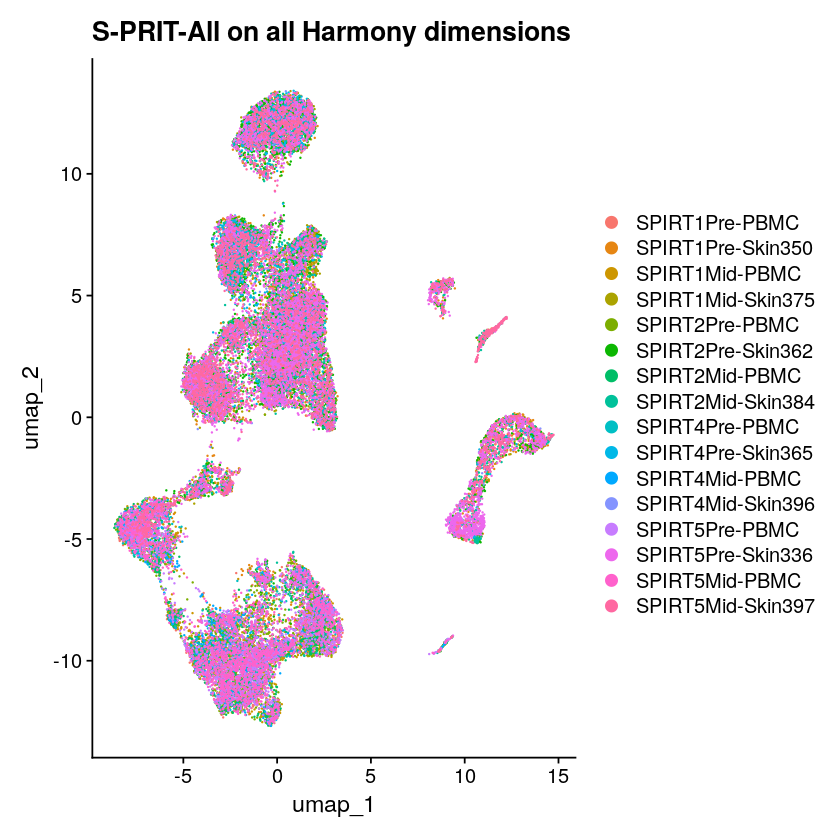

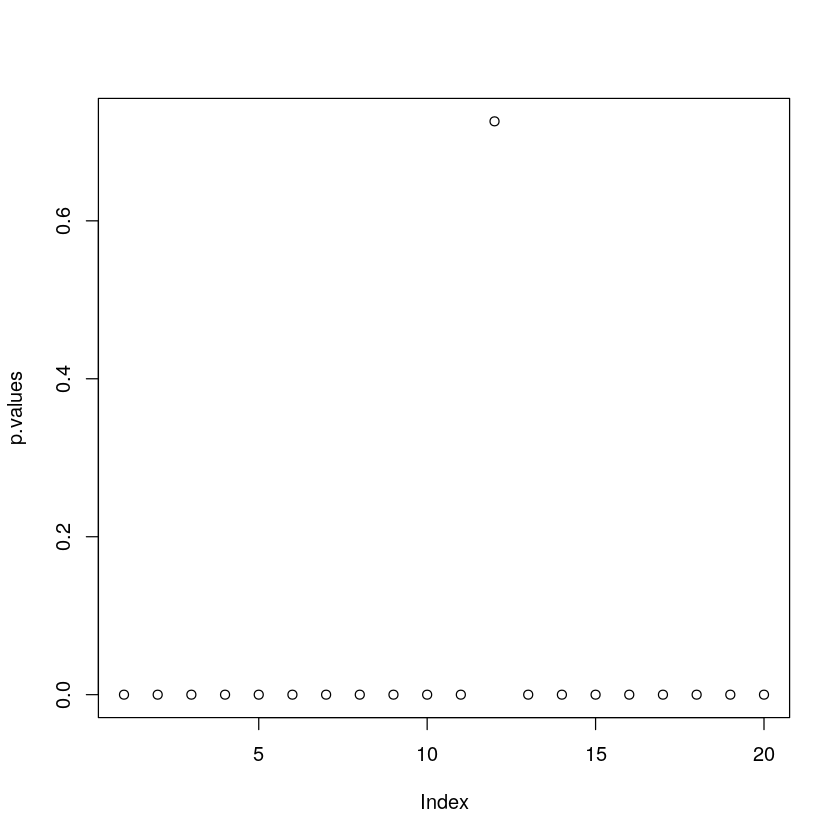

Computing nearest neighbor graph

Computing SNN



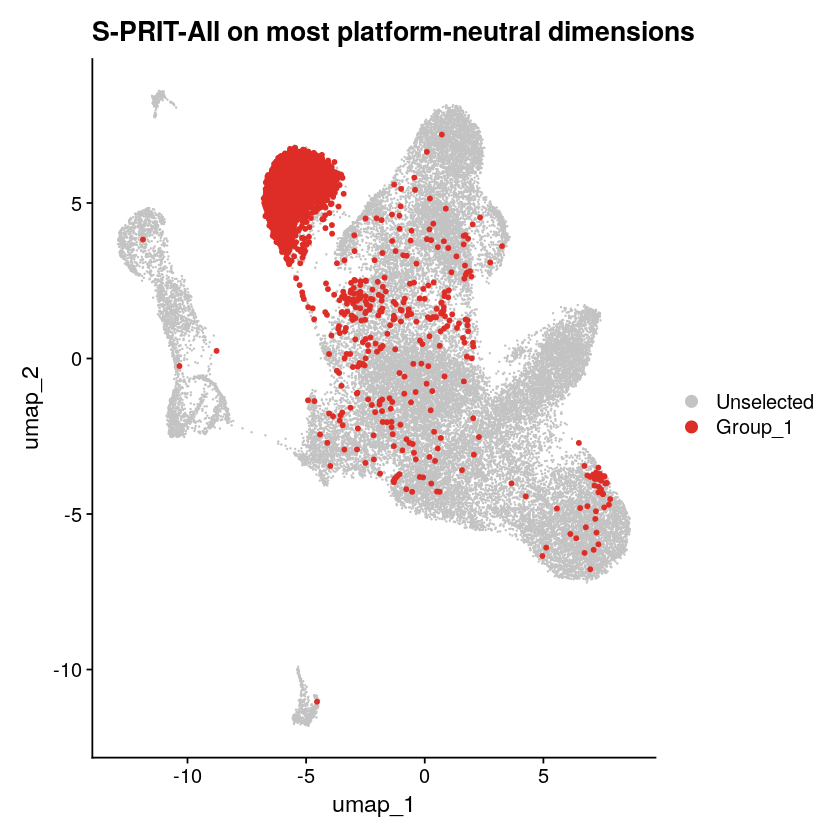

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 36474
Number of edges: 1089732

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9001
Number of communities: 17
Elapsed time: 11 seconds


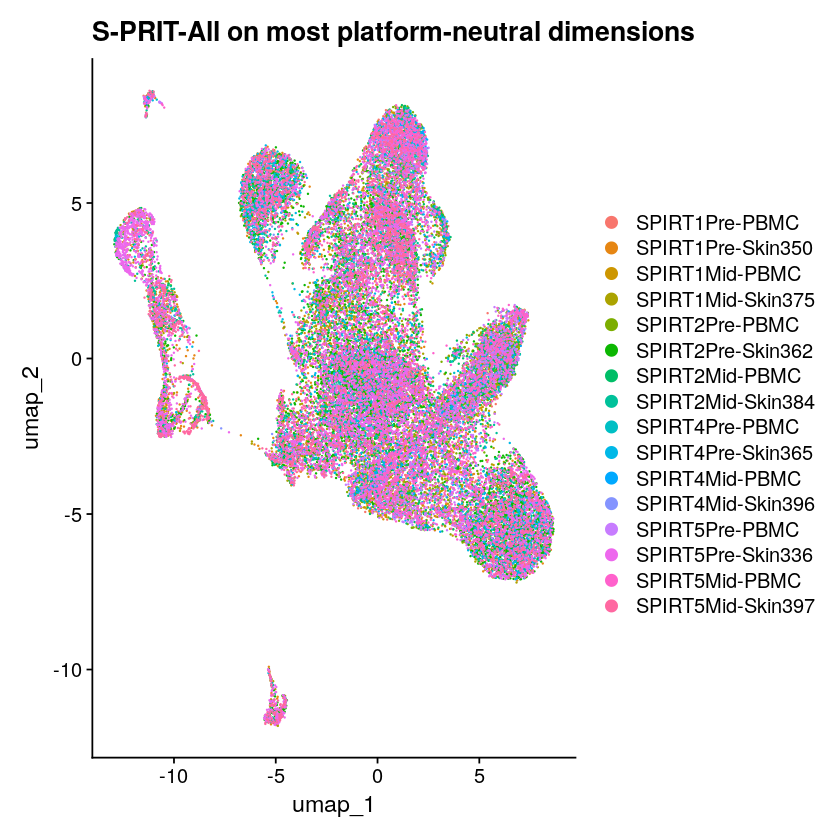

    
        0    1    2    3    4    5    6    7    8    9   10   11   12   13   14
  1  2786  637   88   39  250   64    1    0   92  191    0    6    0  121    0
  2    55   42   22   55    0 1992    1    1   11   88    0    1    1    3    1
  3    25   54 3322    4    3   22    0    0    0    3    0    0    0    1    0
  4  1707  349   77  151   11  246    0    0   19  238    0    2    2    5    1
  5    36   24    3 2672    0   66   41    0   34  123    0    5    0    2    1
  6   207    9    0  333    0   23    3    0    0   93    0    2    0    3    0
  7   467  112   38    8    1   61    0    0  356   35    0    3    0    6    0
  8    29    4    2    3    0    1    0    2   54    7    0    0    0    1    0
  9   407   18    3  166    0   25    6    0   39   67    0  346    0    0    0
  10    0    0    0   53    0    0  594    0    1    6    0  339    0    0    0
  11   11   19   17    3    1   68    0    0    2    5    0    0    0    1    0
  12    0    0    4    0    0    0 

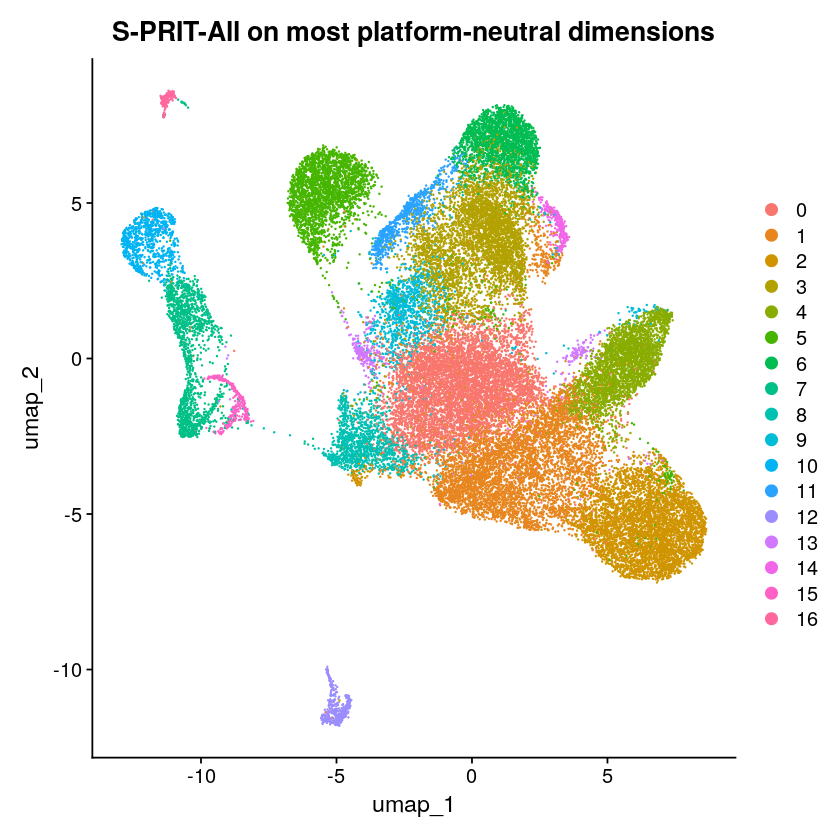

In [4]:
s <- print.cluster.overlap("outs-harmonizeAll/S-PIRT-All.RData", "S-PRIT-All", clusters, "2")

In [5]:
rm(s)

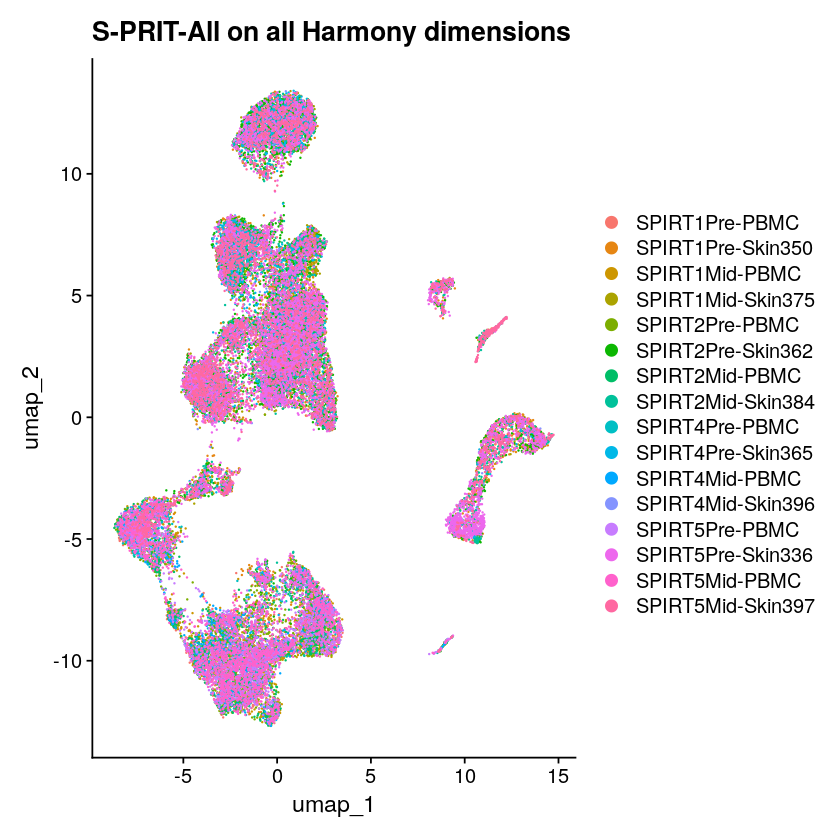

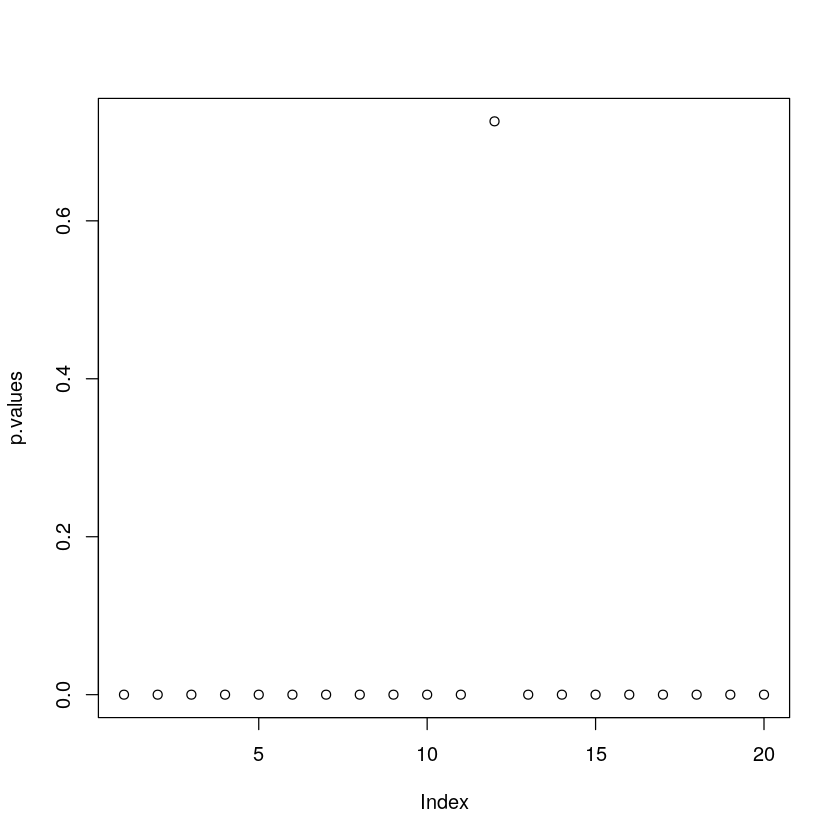

Computing nearest neighbor graph

Computing SNN



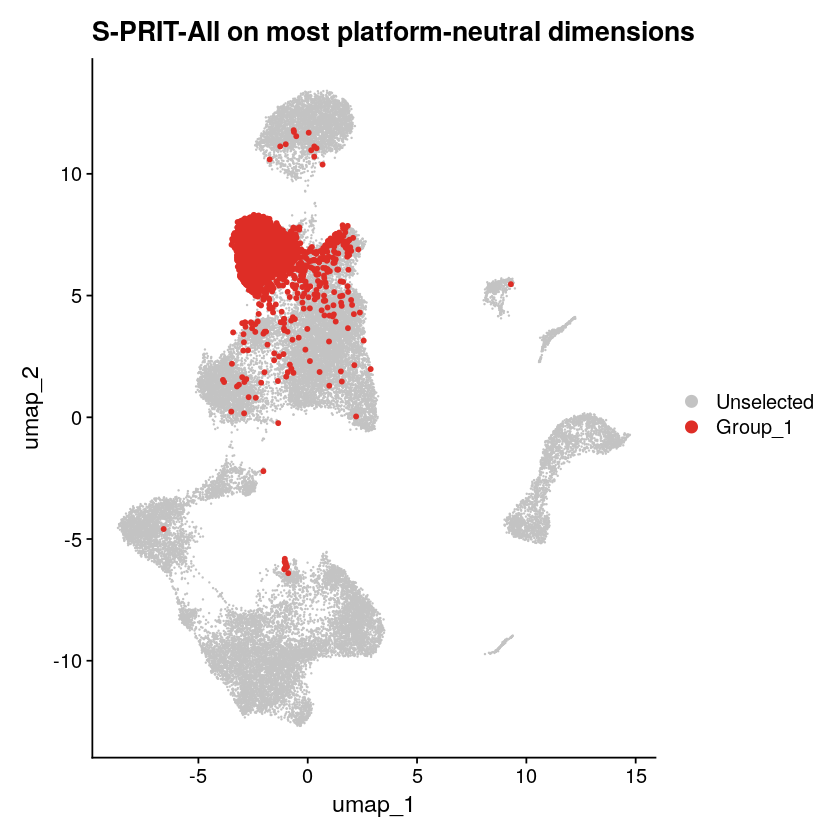

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 36474
Number of edges: 1208960

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9260
Number of communities: 18
Elapsed time: 9 seconds


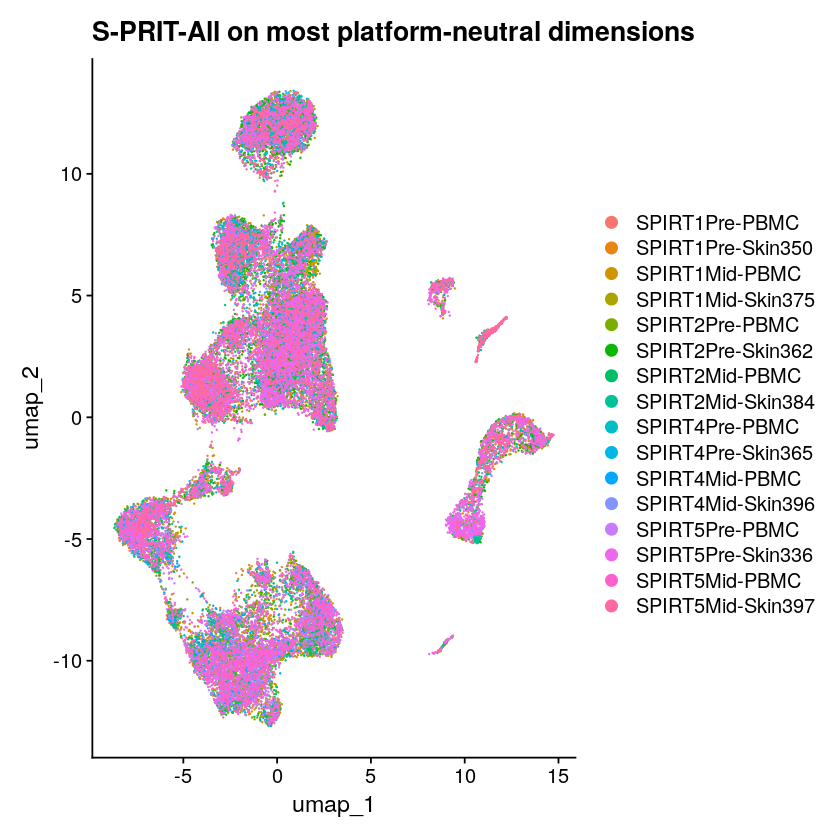

    
        0    1    2    3    4    5    6    7    8    9   10   11   12   13   14
  1  3296    0  108   47   37  281    1  276    0   67    0  157    5    0    0
  2    99    0   11   42 1976    0    1  128    0    4    0   10    1    1    0
  3    43    0 3312    6   34    2    0   13    0    0    0   22    0    0    2
  4  1987    0   71  117  222   11    0  385    0    4    0    6    4    0    1
  5    54    0    2 2689   48    0   48  128    0   27    0    9    2    0    0
  6   253    0    0  322   11    0    6   75    0    0    0    2    4    0    0
  7   547    0   41    4   60    1    0  133    0  291    0    7    3    0    0
  8    31    0    2    5    1    0    0   12    0   45    0    5    0    0    0
  9   437    0    3  151   24    1    7   71    0   21    0    0  362    0    0
  10    0    0    0   18    0    0  654    4    0    1    0    2  314    0    0
  11   32    0   10    2   71    0    0    9    0    2    0    1    0    0    0
  12    0    0    4    0    0    0 

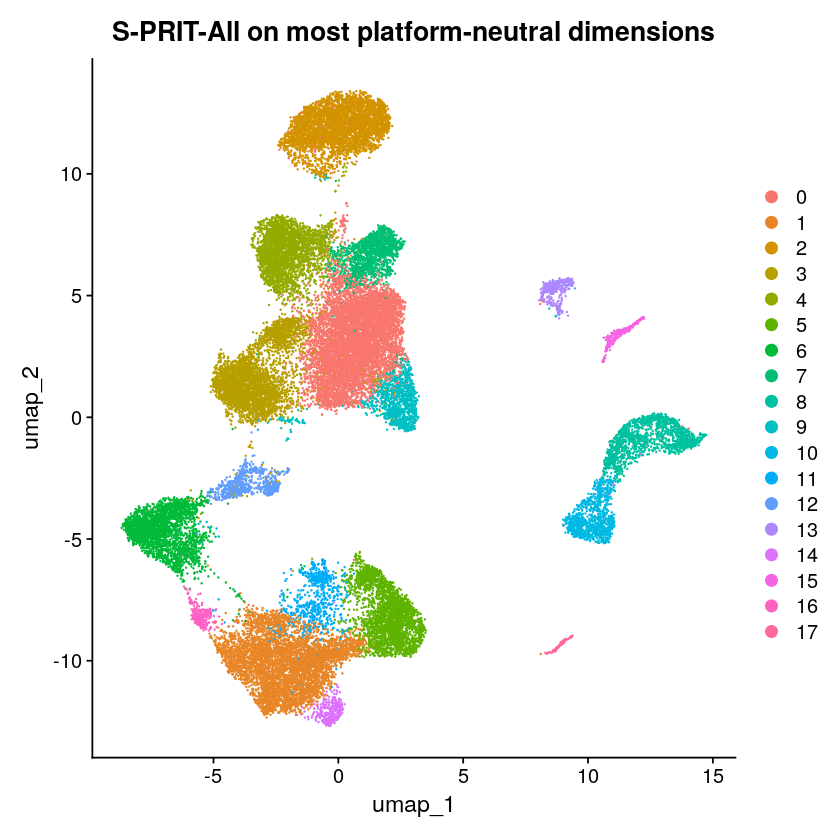

In [6]:
s <- print.cluster.overlap("outs-harmonizeAll/S-PIRT-All.RData", "S-PRIT-All", clusters, "2", keep.components.quantile=0.0)

In [7]:
54

[1] 54